# House Price Prediction Using Polynomial Regression

---

<img src="https://i.ibb.co/BK70Pgj/template.png" width="1280">

**Table of Contents:**

1. Business Understanding
2. Importing Libraries and Datasets
3. Exploring Dataset
4. Data Cleaning
5. Exploratory Data Analysis
6. Data Preprocessing
7. Model Training
8. Model Evaluation
9. Prediction
10. Conclusion

## 1 - Business Understanding

This dataset contains comprehensive information about employees, focusing on various attributes including personal details, job-related information, and performance metrics. The goal is to use these features to predict the salary of the employees.

The primary objective is to predict employee salaries using a comprehensive dataset, involving data preprocessing, exploratory analysis, feature engineering, and model evaluation. By identifying key predictors of salary, the aim is to provide actionable insights and recommendations for HR practices, enhancing salary forecasting accuracy and informing strategic decisions.

## 2 - Importing Libraries and Datasets

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

### Utilities

Filter specific warnings in Pandas.

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, pd.errors.SettingWithCopyWarning))

Sets Matplotlib plot style and parameters.

In [3]:
mpl.style.use(['fivethirtyeight'])
plt.rcParams.update({
  'font.size': 10,
  'lines.linewidth': 1,
  'figure.facecolor': 'white',
  'axes.facecolor': 'white',
  'axes.edgecolor': 'white',
  'axes.titlesize': 18,
  'axes.grid': False,
  'axes.titleweight': 'bold',
  'axes.labelsize': 12,
  'axes.titlepad': 24,
  'axes.labelpad': 16,
  'legend.frameon': True,
  'legend.borderaxespad': 1
})

Creates annotations with y-values for each patch in a plot.

In [4]:
def display_y_values(ax):
  for p in ax.patches:
    ax.annotate(
      f'{p.get_height():.2f}',
      (p.get_x() + p.get_width() / 2.,p.get_height()),
      ha='center',
      fontsize=11,
      xytext=(0, 5),
      textcoords='offset points'
    )

Creates ahistogram plot

In [5]:
def create_hist_plot(data, color, column):
  plt.figure(figsize=(12,6))
  sns.histplot(data, kde=True, alpha=0.6, color=color, edgecolor='white')
  plt.title('{} Distribution'.format(column))
  plt.xlabel(column)
  plt.tight_layout()
  plt.show()

Converts snake_case strings to title case.

In [6]:
to_title_case = lambda str:str.replace('_', ' ').title()

Creates a box plot

In [7]:
def make_box_plot(column, color):
  plt.figure(figsize=(12,6))
  sns.boxplot(
    x=column,
    data=df,
    color=color,
    medianprops=dict(color='white', linewidth=2),
    whiskerprops=dict(color='darkslategrey', linestyle='dashed', linewidth=1.5),
    capprops=dict(color='darkslategrey', linewidth=1.5),
    boxprops=dict(linewidth=1.5)
  )
  plt.title(to_title_case(column))
  plt.xlabel(to_title_case(column))
  plt.tight_layout()
  plt.show()

Create a bar plot

In [8]:
def make_bar_plot(data, x, y, title=''):
  plt.figure(figsize=(12, 6))
  ax = sns.barplot(data=data, x=x, y=y, palette='plasma')

  plt.xlabel(to_title_case(x))
  plt.ylabel(to_title_case(y))
  plt.title(title)
  display_y_values(ax)
  plt.show()

Download the dataset from a given URL.

In [9]:
source_url = 'https://raw.githubusercontent.com/akhildev-mj/datasets/main/'
dataset_url = source_url + 'regression/housing_prices.csv'

!wget -O dataset.csv $dataset_url
print('Download completed')

--2024-06-05 06:10:07--  https://raw.githubusercontent.com/akhildev-mj/datasets/main/regression/housing_prices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29981 (29K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]  29.28K  --.-KB/s    in 0.003s  

2024-06-05 06:10:07 (11.2 MB/s) - ‘dataset.csv’ saved [29981/29981]

Download completed


### Importing Datasets

In [10]:
df = pd.read_csv('dataset.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 3 - Exploring Dataset

Summary information about the DataFrame.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Descriptive statistics for the numerical columns in the DataFrame.

In [12]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Descriptive statistics for the categorical columns in the DataFrame.

In [13]:
df.describe(include=['object'])

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


## 4 - Data Cleaning

### Missing Values

Print the total number of missing values in the DataFrame.

In [14]:
print('Number of missing values:', df.isnull().sum().sum())

Number of missing values: 0


### Duplicate Values

Print the total number of duplicate rows in the DataFrame.

In [15]:
print('Number of duplicates:', len(df[df.duplicated()]))

Number of duplicates: 0


## 5 - Exploratory Data Analysis

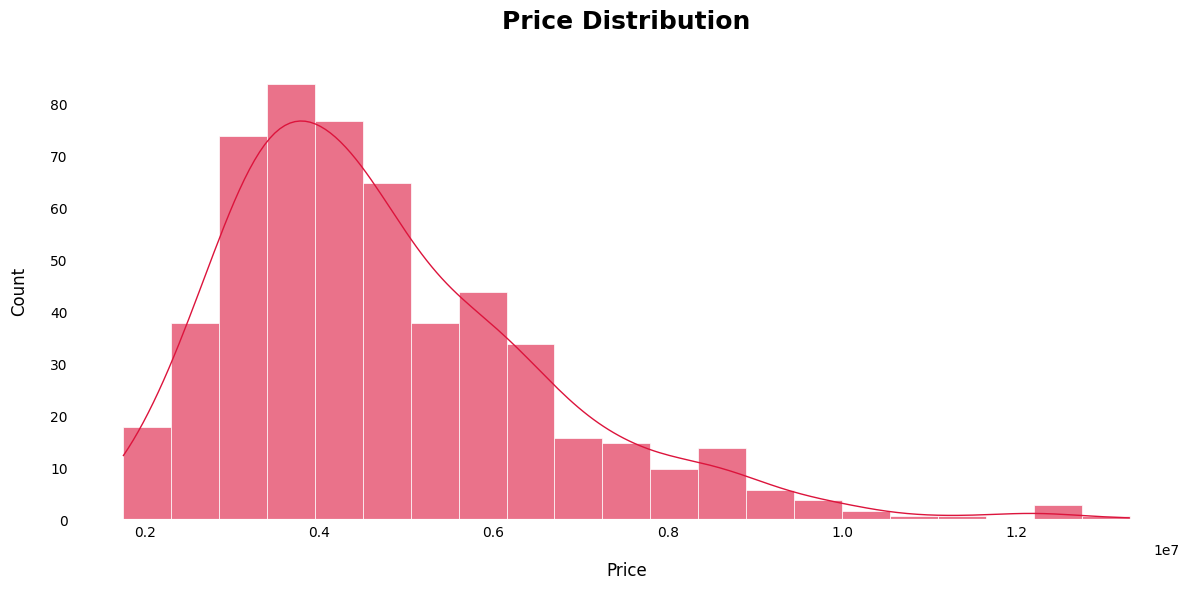

In [16]:
create_hist_plot(df['price'], 'crimson', 'Price')

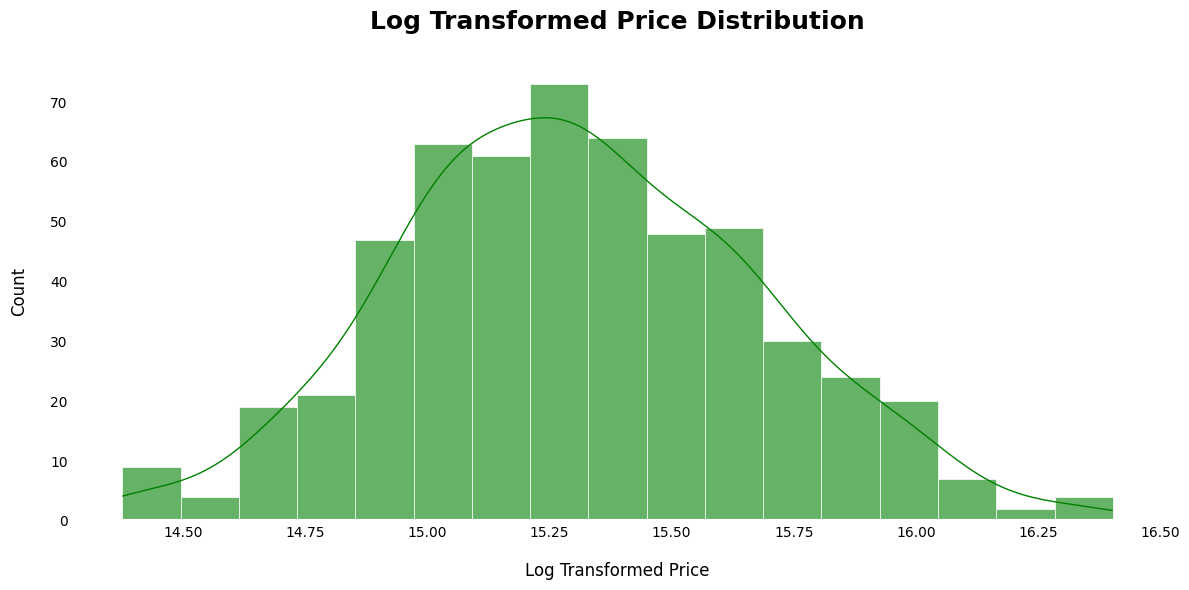

In [17]:
create_hist_plot(np.log(df['price']), 'green', 'Log Transformed Price')

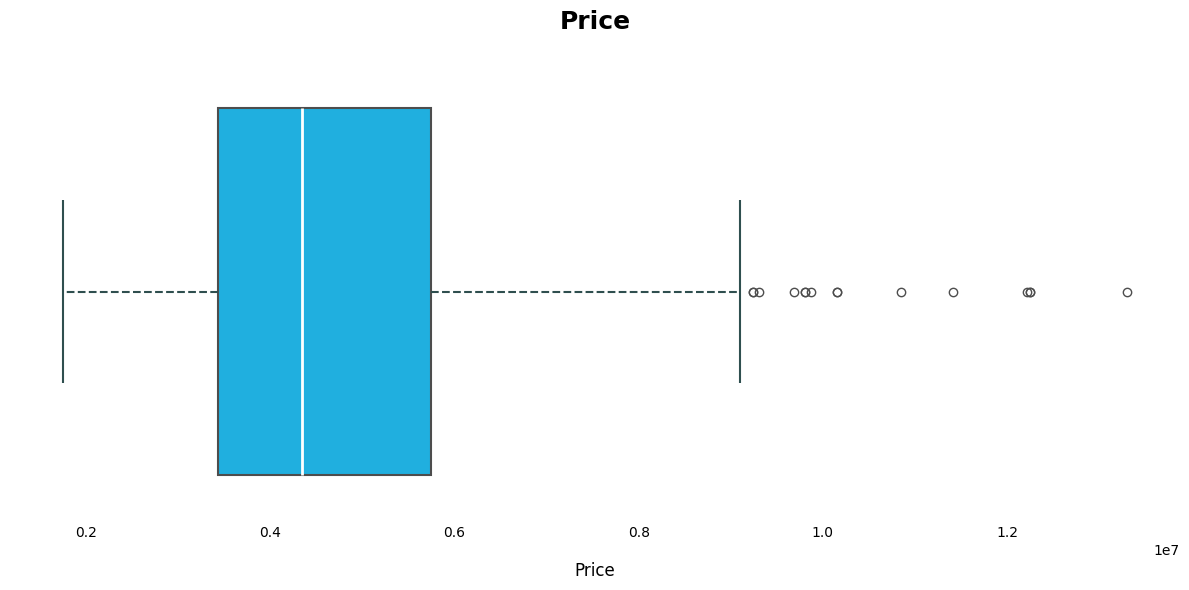

In [18]:
make_box_plot('price', 'deepskyblue')

## 6 - Data Preprocessing

### Converting Categorical Columns

Convert all boolean columns to integer

In [19]:
boolean_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
boolean_mapping = {'yes': 1, 'no': 0}

for column in boolean_columns:
  df[column] = df[column].map(boolean_mapping)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


Convert funishing status column to numerical by keeping the magnitude

In [20]:
furnishingstatus_mapping = {
  'unfurnished': 0,
  'semi-furnished': 1,
  'furnished': 2
}

df['furnishingstatus'] = df['furnishingstatus'].map(furnishingstatus_mapping)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


### Extracting New Feature Columns

Create a new column which is the sum of bed, bath, guest rooms

In [21]:
df['totalrooms'] = df['bedrooms'] + df['bathrooms'] + df['guestroom']

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,totalrooms
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,6
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,8
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,6
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,6


### Splitting Data into Features(X) and Target(y)

Select the feature variable as the highly correlated feature, i.e., SpecialProjectsCount, and set the target variable as Salary.

In [22]:
target = 'price'

X = df.drop(columns=[target])
y = df[target]

print('The shape of X is', X.shape)
print('The shape of y is', y.shape)

The shape of X is (545, 13)
The shape of y is (545,)


### Feature Selection

Correlation heatmap of the data frame.

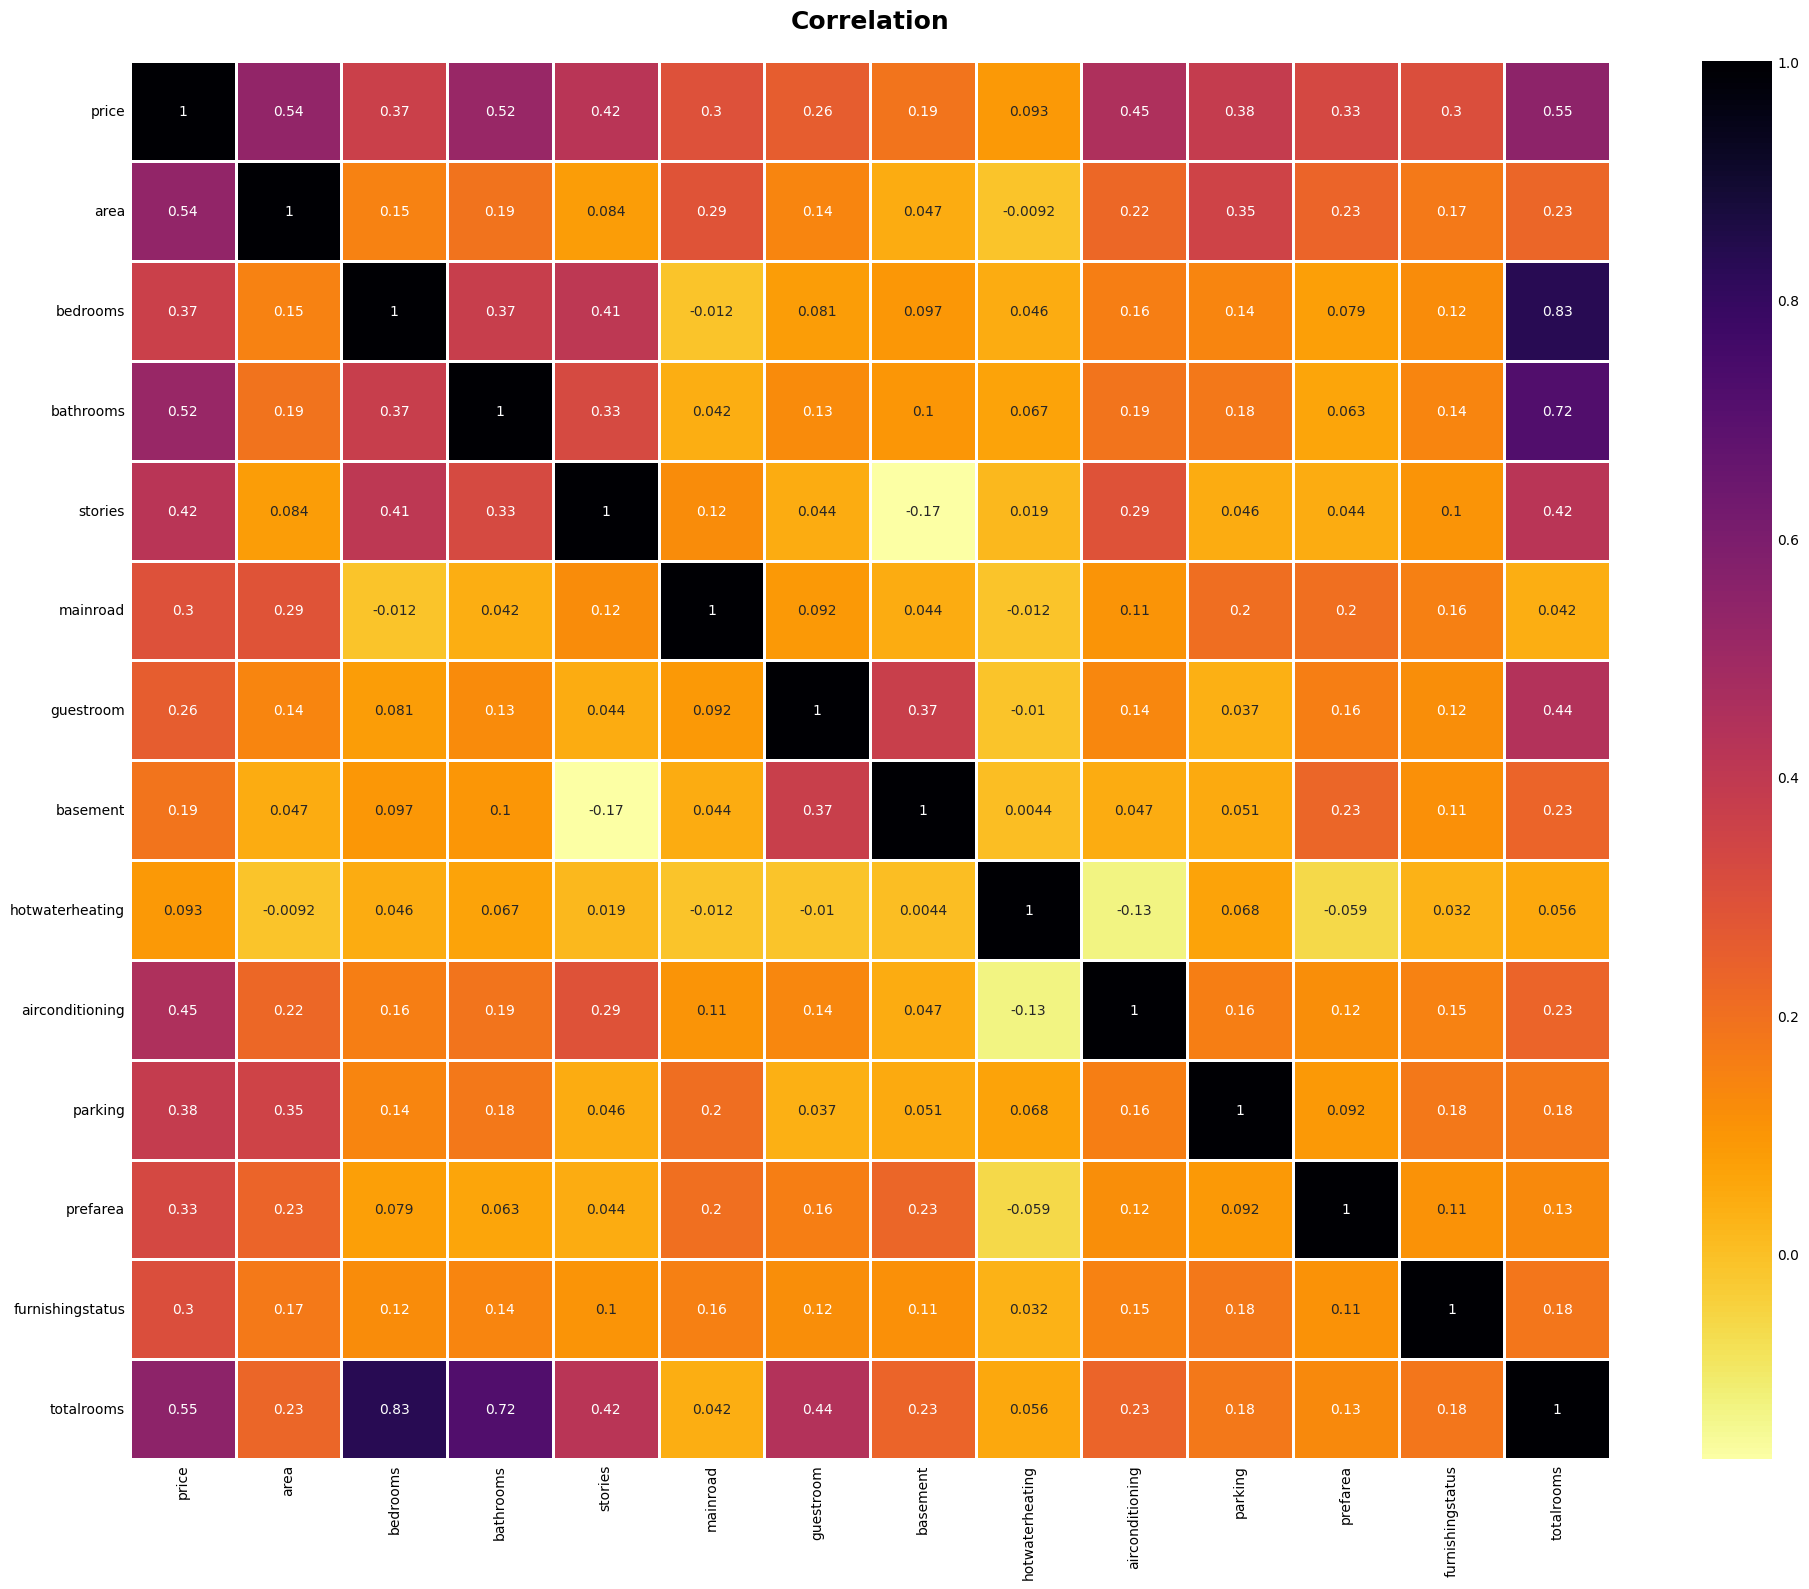

In [23]:
plt.figure(figsize=(20, 16))
sns.heatmap(
  data=df.corr(numeric_only=True),
  annot=True,
  cmap='inferno_r',
  linewidths=1
)
plt.title('Correlation')
plt.tight_layout()
plt.show()

Create a new data frame containing the column names as features and their corresponding correlation and mutual information score with respect to the target feature.

In [24]:
feature_score_df = pd.DataFrame(
  {
    'feature': X.columns,
    'correlation': X.corrwith(y).abs(),
    'mutual_info_score': mutual_info_regression(X, y),
    'combined_score': X.corrwith(y).abs() + mutual_info_regression(X, y)
  }
)

feature_score_df.reset_index(drop=True, inplace=True)
feature_score_df.head()

,feature,correlation,mutual_info_score,combined_score
0,area,0.535997,0.171328,0.710229
1,bedrooms,0.366494,0.107492,0.464210
2,bathrooms,0.517545,0.137303,0.671326
3,stories,0.420712,0.145296,0.536907
4,mainroad,0.296898,0.092835,0.355157


Visualize the top features using correlation values.

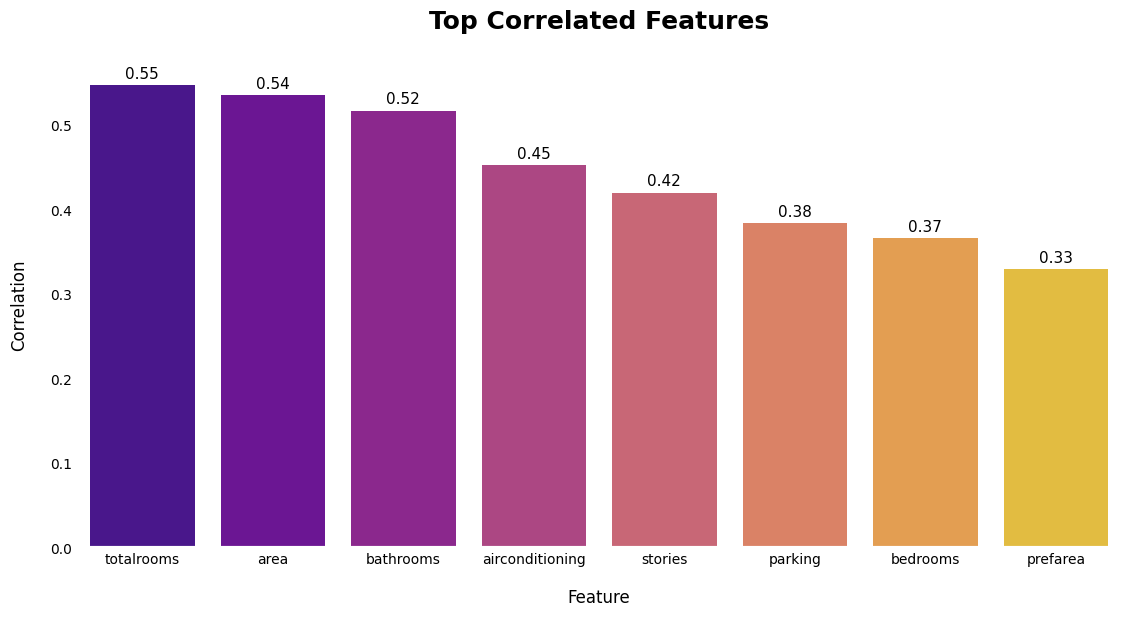

In [25]:
make_bar_plot(
  feature_score_df.sort_values(by='correlation', ascending=False)[:8],
  'feature',
  'correlation',
  'Top Correlated Features'
)

Visualize the top features using mutual information scores.

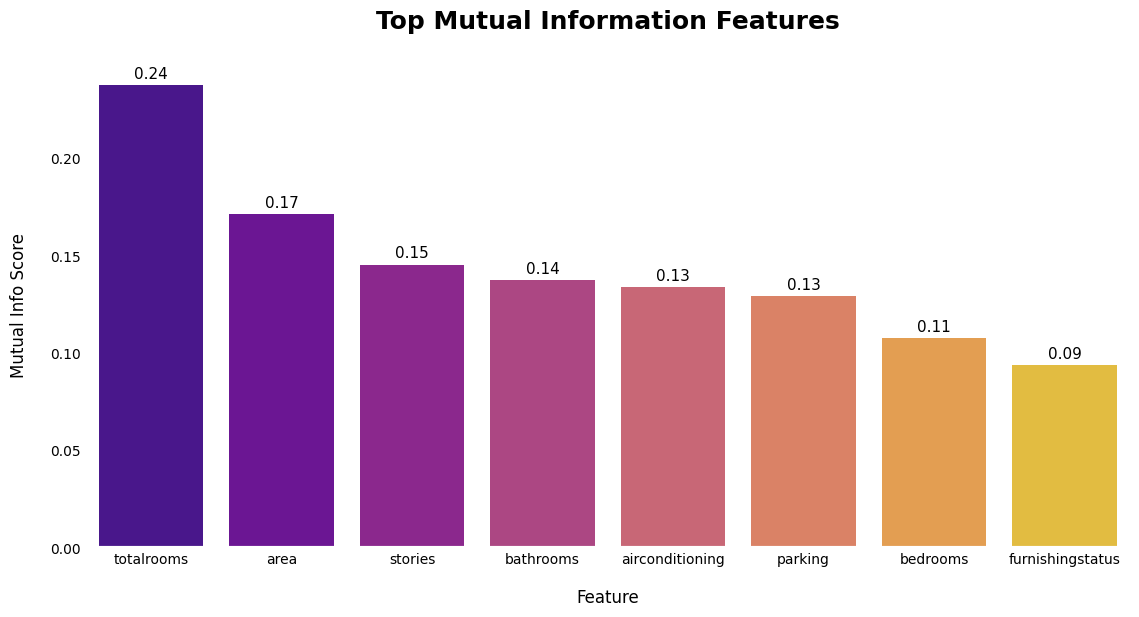

In [26]:
make_bar_plot(
  feature_score_df.sort_values(by='mutual_info_score', ascending=False)[:8],
  'feature',
  'mutual_info_score',
  'Top Mutual Information Features'
)

Visualize the top features using the combination of the correlation value and the mutual information score.

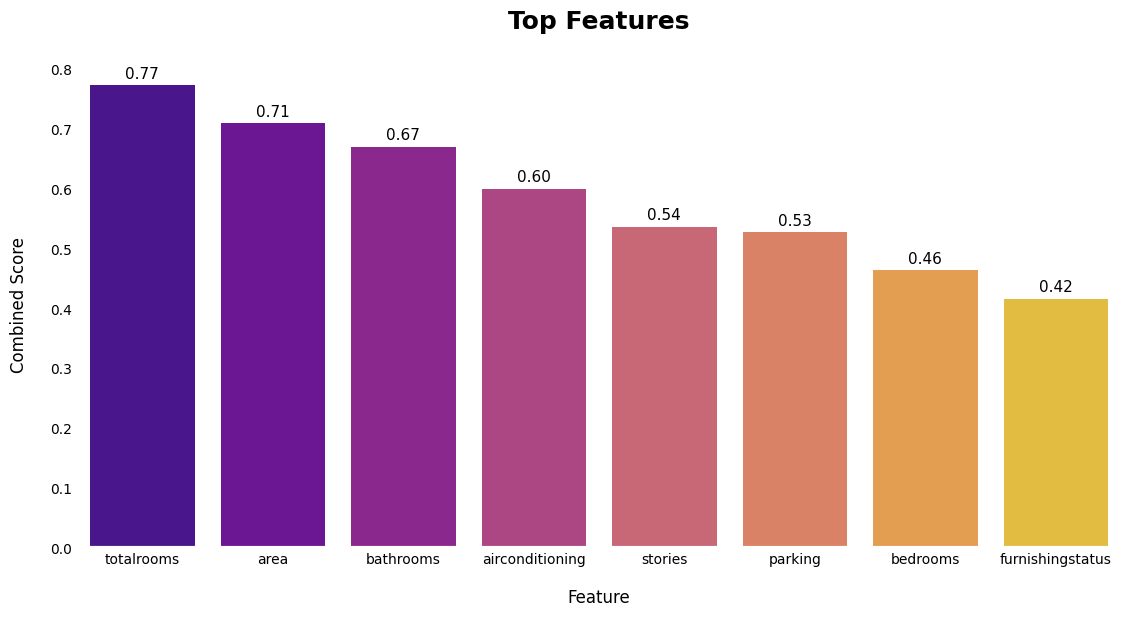

In [27]:
make_bar_plot(
  feature_score_df.sort_values(by='combined_score', ascending=False)[:8],
  'feature',
  'combined_score',
  'Top Features'
)

Select the top features using the combination of the correlation value and the mutual information score.

In [28]:
X = X[feature_score_df[feature_score_df['combined_score'] > 0.3]['feature'].to_list()]

X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,airconditioning,parking,prefarea,furnishingstatus,totalrooms
0,7420,4,2,3,1,0,1,2,1,2,6
1,8960,4,4,4,1,0,1,3,0,2,8
2,9960,3,2,2,1,0,0,2,1,1,5
3,7500,4,2,2,1,0,1,3,1,2,6
4,7420,4,1,2,1,1,1,2,0,2,6


### Data Transformation

Transform target variable using log function

In [29]:
y = np.log(y)

y[:5]

0    16.403275
1    16.321036
2    16.321036
3    16.318175
4    16.250001
Name: price, dtype: float64

### Splitting Features(X) and Target(y) for Training and Testing

Split featurea and target datas using train_test_split method

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print('The shape of X_train is', X_train.shape)
print('The shape of y_train is', y_train.shape)
print('The shape of X_test is', X_test.shape)
print('The shape of y_test is', y_test.shape)

The shape of X_train is (436, 11)
The shape of y_train is (436,)
The shape of X_test is (109, 11)
The shape of y_test is (109,)


## 7 - Model Training

Initialize the pipeline

In [31]:
pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('poly', PolynomialFeatures(degree=1)),
  ('regression', Ridge())
])

Define parameter values for grid search

In [32]:
param_grid = {
  'poly__degree': [1, 2, 3],
  'regression__alpha': [0.1, 0.5, 1] + list(range(5, 100, 5))
}

Perform grid search and print the best parameters and the corresponding score

In [33]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print('Best Parameters: ', best_params)
print('Best Score: ', grid_search.best_score_)

Best Parameters:  {'poly__degree': 1, 'regression__alpha': 30}
Best Score:  0.6599004194562358


Update pipeline hyper parameters with the best parameters obtained from Grid Search

In [34]:
pipeline.named_steps['poly'].set_params(degree=best_params['poly__degree'])
pipeline.named_steps['regression'].set_params(alpha=best_params['regression__alpha'])

pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('regression', Ridge(alpha=30))])

Fit the model using train data

In [35]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('regression', Ridge(alpha=30))])

## 8 - Model Evaluation

Predict for test data

In [36]:
y_pred = pipeline.predict(X_test)

y_pred[:5]

array([15.04834547, 15.17520799, 14.80789311, 15.0140175 , 15.68404359])

Evaluation results

In [37]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = metrics.r2_score(y_test, y_pred)

print('Model    -  {}'.format(type(pipeline).__name__))
print('MAE      - ', np.round(mae, 4))
print('MSE      - ', np.round(mse, 4))
print('RMSE     - ', np.round(rmse, 4))
print('R2 Score - ', np.round(r2_score, 2))

Model    -  Pipeline
MAE      -  0.1715
MSE      -  0.0512
RMSE     -  0.2263
R2 Score -  0.61


## 9 - Prediction

Create dataframe for prediction

In [38]:
prediction_df = pd.DataFrame([{
  'area': 7475,
  'bedrooms': 3,
  'bathrooms': 2,
  'stories':4,
  'mainroad': 1,
  'guestroom': 0,
  'airconditioning': 1,
  'parking': 2,
  'prefarea': 0,
  'furnishingstatus': 0,
  'totalrooms': 5
}])

prediction_df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,airconditioning,parking,prefarea,furnishingstatus,totalrooms
0,7475,3,2,4,1,0,1,2,0,0,5


Predict for given data

In [39]:
prediction = np.exp(pipeline.predict(prediction_df)[0])

print('Price prediction for given data is', round(prediction, 2))

Price prediction for given data is 6915093.75


## 10 - Conclusion

For this dataset, the polynomial regression model yielded below average outcomes.